## Lab 8a - mining and analysis of internet data

From the [Canadian Historical Weather Database](http://climate.weather.gc.ca/historical_data/search_historic_data_e.html) download all the **daily** weather data for the Calgary International Airport **(CALGARY INTL A)** and the Edmonton International Airport **(EDMONTON INTL A)** for the years 2014, 2015, 2016, 2017 and 2018. 

Write code to load this data, so that you can access the daily max temperature, min temperature, mean termperature, total rain, total snow and total precipitation. 

## (1) Make three plots

for the daily (a) max, (b) min, (c) mean temperatures for Calgary (horizonal) vs. Edmonton (vertical).  Include in your plot both a linear and quadratic least-squares interpolation.  Give your plots appropriate titles.  Include a legend describing the point plot, as well as the least square interpolation. 

Does your plot settle the age old dispute of whether or not Edmonton or Calgary is **colder**?

In [1]:
import os as os
import fnmatch as fn ## library for listing files matching
  ##  *blah* all files with word blah in its name
  ##  wildcard matching
import collections as co

wsubdir = fn.filter(os.listdir('./data'), "w.*")

## manipulated dates and times 
import datetime as dt


In [2]:
print("Temperature subdirectories: ",wsubdir)

Temperature subdirectories:  ['w.calgary', 'w.edmonton']


In [3]:
## go through the subdirectories data/wsubdir[]
## load the files, then process them into a data type
## basic line formatting
def fmtline(ln):
    PL = ln.translate({ord(c): None for c in '"\n'})
    PL = PL.split(",")
    return(PL)

In [4]:
initDat = co.defaultdict(dict)

for wd in wsubdir:
    files = fn.filter(os.listdir('./data/'+wd), "eng-daily*.csv")
    for wdf in files:
        with open('./data/'+wd+'/'+wdf, encoding='utf-8') as f:
            content = f.readlines()

            ## find line describing columns
            keylines = [i for i in range(len(content)) if 'date/time' in\
                        content[i].lower()]
            if len(keylines)!=1:
                print("Error: "+wd+'/'+wdf+" key error. ")
                () = () + 1 ## cute way to get jupyter to crash.

            ## find station data
            stnlines = [i for i in range(len(content)) if\
                        'station name' in\
                        content[i].lower()]
            if len(stnlines)!=1:
                print("Error: "+wd+'/'+wdf+" stn name error. ")
                () = () + 1

            airpt = fmtline(content[stnlines[0]])[1]
            keys = fmtline(content[keylines[0]])
            ## get date/time index
            dti = [j for j in range(len(keys)) if 'date/time' in\
                   keys[j].lower()]
            if len(dti)!=1:
                print("Error: "+wd+'/'+wdf+' date/time idx. ')
                () = () + 1

            ## let's collect the data
            for i in range(keylines[0]+1, len(content)):
                ln = fmtline(content[i])
                ## convert date/time to python datetime object
                ln[dti[0]] = dt.datetime.strptime(ln[dti[0]],\
                                                  "%Y-%m-%d")

                initDat[airpt][ln[dti[0]]] =\
                dict( [ (keys[j] , ln[j]) for j in\
                                                    range(len(keys)) if j != dti[0] ] )

In [5]:
print(initDat.keys())

dict_keys(['CALGARY INTL A', 'EDMONTON INTL A'])


In [6]:
len(initDat['CALGARY INTL A'])

1826

In [7]:
type(initDat['CALGARY INTL A'].keys())

dict_keys

In [8]:
print(list(initDat["CALGARY INTL A"].keys())[0].date())

2017-01-01


In [9]:
print(list(initDat["EDMONTON INTL A"].keys())[0].date())

2017-01-01


In [10]:
initDat["CALGARY INTL A"]\
     [dt.datetime.strptime("2017-1-1","%Y-%m-%d")]

{'Year': '2017',
 'Month': '01',
 'Day': '01',
 'Data Quality': '',
 'Max Temp (°C)': '-7.8',
 'Max Temp Flag': '',
 'Min Temp (°C)': '-17.4',
 'Min Temp Flag': '',
 'Mean Temp (°C)': '-12.6',
 'Mean Temp Flag': '',
 'Heat Deg Days (°C)': '30.6',
 'Heat Deg Days Flag': '',
 'Cool Deg Days (°C)': '0.0',
 'Cool Deg Days Flag': '',
 'Total Rain (mm)': '0.0',
 'Total Rain Flag': '',
 'Total Snow (cm)': '3.6',
 'Total Snow Flag': '',
 'Total Precip (mm)': '2.0',
 'Total Precip Flag': '',
 'Snow on Grnd (cm)': '12',
 'Snow on Grnd Flag': '',
 'Dir of Max Gust (10s deg)': '1',
 'Dir of Max Gust Flag': '',
 'Spd of Max Gust (km/h)': '46',
 'Spd of Max Gust Flag': ''}

In [11]:
## write some code to check that our data isn't missing any dates
## let's write code to print out first date, last date and any
## missing dates inbetween. 

airpts = list(initDat.keys())
for A in airpts:
    ## print out first and last dates in the initDat[A]
    DTL = sorted(initDat[A].keys())
    print(DTL[0], DTL[-1], end=' ')
    print(A)
    ## check for missing data. 
    ## collect all dates with missing data
    Dt = DTL[0]
    while Dt<DTL[-1]:
        if Dt not in DTL:
            print("Missing ", dt)
        Dt += dt.timedelta(days=1)
## essentially complete data set

2014-01-01 00:00:00 2018-12-31 00:00:00 CALGARY INTL A
2014-01-01 00:00:00 2018-12-31 00:00:00 EDMONTON INTL A


In [12]:
## merging dictionaries
## use the update() command
## this moves all the entries from a 2nd dictionary into the 1st
caldict = dict()
edmdict = dict()
for k in initDat.keys():
    if 'EDMONTON' in k:
        edmdict.update(initDat[k])
    if 'CALGARY' in k:
        caldict.update(initDat[k])
print(len(caldict))
print(len(edmdict))

1826
1826


In [13]:
ncl = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)']

## set of dates w/measurements
caldt = set([k for k,d in caldict.items() if len(d[ncl[0]])!=0\
              and len(d[ncl[1]])!=0 and len(d[ncl[2]])!=0])
edmdt = set([k for k,d in edmdict.items() if len(d[ncl[0]])!=0\
              and len(d[ncl[1]])!=0 and len(d[ncl[2]])!=0])

comdt = caldt.intersection(edmdt)
coml = sorted(comdt)

## clean data
dictlist = [caldict, edmdict]

In [14]:
sdt = sorted(coml)
print(type(sdt))
print(sdt[0])
print(type(caldict[sdt[0]]['Max Temp (°C)']))

<class 'list'>
2014-01-01 00:00:00
<class 'str'>


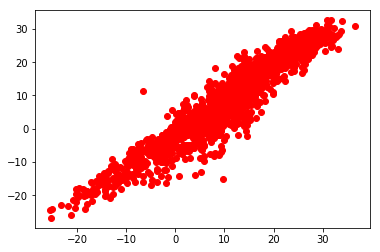

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

## saskatoon max temp on x-axis
X = [float(caldict[x]['Max Temp (°C)']) for x in sdt]
Y = [float(edmdict[x]['Max Temp (°C)']) for x in sdt]

plt.plot(X, Y, 'ro')

[[-2.52015447]
 [ 1.0471031 ]]


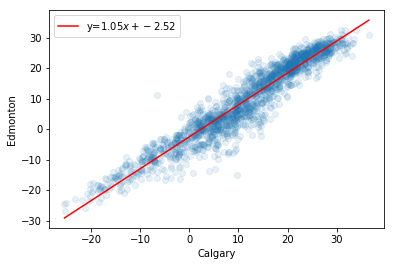

In [36]:
## numpy matrices
import numpy as np
Al = np.matrix([[1.0, x] for x in X]).T
yl = np.matrix(Y).T
cl = np.linalg.inv(Al*Al.T)*Al*yl
print(cl)
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X, Y, alpha=0.1)
dom = np.linspace(min(X), max(X), 1000)
ran = [cl[0,0] + cl[1,0]*x for x in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.2fx+%2.2f$' %(cl[1,0], cl[0,0]))
plt.legend()

In [17]:
A = np.matrix([[1.0, x, x**2] for x in X]).T
y = np.matrix(Y).T
c = np.linalg.inv(A*A.T)*A*y

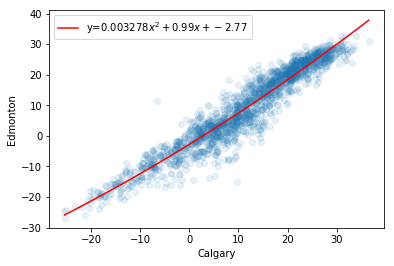

In [18]:
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X, Y, alpha=0.1)
dom = np.linspace(min(X), max(X), 1000)
ran = [c[0,0] + c[1,0]*x + c[2,0]*x**2 for x in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(c[2,0],c[1,0], c[0,0]))
plt.legend()

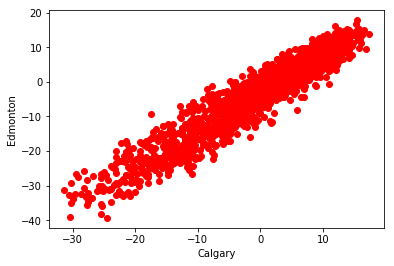

In [20]:
## saskatoon max temp on x-axis
Xmin = [float(caldict[x]['Min Temp (°C)']) for x in sdt]
Ymin = [float(edmdict[x]['Min Temp (°C)']) for x in sdt]
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.plot(Xmin, Ymin, 'ro')

[[-2.93288071]
 [ 1.06876383]]


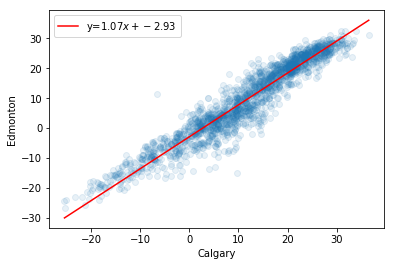

In [37]:
B = np.matrix([[1.0, x] for x in Xmin]).T
f = np.matrix(Ymin).T
d = np.linalg.inv(B*B.T)*B*f
print(d)
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X, Y, alpha=0.1)
dom = np.linspace(min(X), max(X), 1000)
ran = [d[0,0] + d[1,0]*x for x in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.2fx+%2.2f$' %(d[1,0], d[0,0]))
plt.legend()

In [28]:
Amin = np.matrix([[1.0, x, x**2] for x in Xmin]).T
ymin = np.matrix(Ymin).T
cmin = np.linalg.inv(Amin*Amin.T)*Amin*ymin

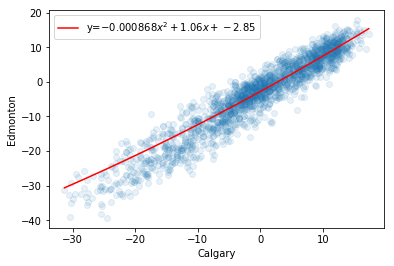

In [29]:
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(Xmin, Ymin, alpha=0.1)
dom = np.linspace(min(Xmin), max(Xmin), 1000)
ran = [c[0,0] + c[1,0]*x + c[2,0]*x**2 for x in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(cmin[2,0],cmin[1,0], cmin[0,0]))
plt.legend()

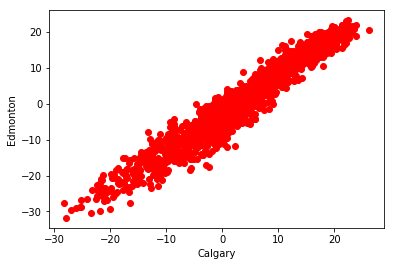

In [24]:
Xmean = [float(caldict[x]['Mean Temp (°C)']) for x in sdt]
Ymean = [float(edmdict[x]['Mean Temp (°C)']) for x in sdt]
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.plot(Xmean, Ymean, 'ro')

[[-2.89155272]
 [ 1.0756018 ]]


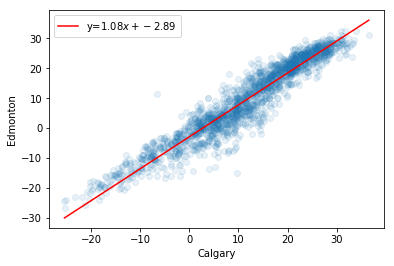

In [38]:
U = np.matrix([[1.0, x] for x in Xmean]).T
P = np.matrix(Ymean).T
Q = np.linalg.inv(U*U.T)*U*P
print(Q)
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X, Y, alpha=0.1)
dom = np.linspace(min(X), max(X), 1000)
ran = [d[0,0] + d[1,0]*x for x in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.2fx+%2.2f$' %(Q[1,0], Q[0,0]))
plt.legend()

In [30]:
Amu = np.matrix([[1.0, x, x**2] for x in Xmean]).T
ymu = np.matrix(Ymean).T
cmu = np.linalg.inv(Amu*Amu.T)*Amu*ymu

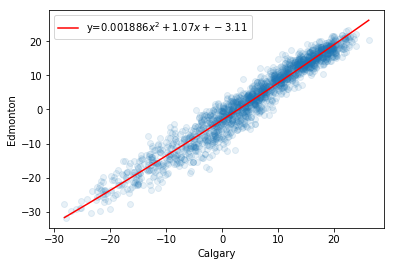

In [31]:
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(Xmean, Ymean, alpha=0.1)
dom = np.linspace(min(Xmean), max(Xmean), 1000)
ran = [cmu[0,0] + cmu[1,0]*x + cmu[2,0]*x**2 for x in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(cmu[2,0],cmu[1,0], cmu[0,0]))
plt.legend()

 * * *

## (2) For the years 2014--2018, plot 

 * (a) the average total precipitation, by month for Edmonton.  
 
 * (b) Similarly, in another plot give the average total precipitation, by month, for Calgary. 
 
i.e. each plot will have **12** bars, labelled by the name of the month.  The bar height will be the average precipitation for that month over the stated five year period. You can access ASCII strings for the month names via the **datetime** library.  Here is the link for the [barplot call](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html). 

In plot (a) for the months where Edmonton's precipitation exceeds Calgary's, make the bar red.  Make the remaining bars blue. Similarly, in plot (b) if Calgary's precipitation exceeds Edmonton's make the bar red, and blue when it does not.

In [45]:
cprec= set([k for k,d in caldict.items() if len(d[ncl[5]])!=0])
              
eprec= set([k for k,d in edmdict.items() if len(d[ncl[5]])!=0])
              

In [46]:
com = cprec.intersection(eprec)
comp = sorted(com)
## clean data
sdt = sorted(comp)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
len(Xpre)

1791